# Multilevel modification on predefined DR-embedding

## Imports

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import networkx as nx
import pandas as pd
import umap.plot
from ucimlrepo import fetch_ucirepo

In [33]:
import sys

sys.path.append("../")
import visualization
import processing
import evaluation

## UCI-ID 186, Wine Quality

### Import

In [ ]:
# fetch dataset (available at https://archive.ics.uci.edu/dataset/186/wine+quality)
dataset = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X_uci186 = pd.DataFrame(dataset.data.features, dtype="float32")
y_uci186 = pd.DataFrame(dataset.data.targets, dtype="float32")

target_feature_uci186 = "pH"
X_uci186.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Compute initial UMAP-Embedding

In [35]:
umap_mapper_uci186 = umap.UMAP(n_neighbors=15, min_dist=1, random_state=0)
umap_mapper_uci186.fit(X_uci186)
umap_embedding_uci186 = umap_mapper_uci186.embedding_
graph_umap_knn_uci186 = umap_mapper_uci186.graph_

graph_umap_knn_uci186 = nx.Graph(graph_umap_knn_uci186)

d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [36]:
pairwise_distances_uci186 = processing.compute_pairwise_dists(
    X_uci186, invert=False, sim_features=[target_feature_uci186]
)

for u, v in graph_umap_knn_uci186.edges():
    graph_umap_knn_uci186[u][v]["weight"] = pairwise_distances_uci186[u][v]

### Compute Modifications

In [37]:
embeddings_uci186 = processing.compute_multilevel_dr(
    graph=graph_umap_knn_uci186,
    initial_pos=umap_embedding_uci186,
    pairwise_dists=pairwise_distances_uci186,
    mst=False,
    boundary_edges=False,
    threshold=None,
)

------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 1


d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\networkx\drawing\layout.py:724: RuntimeWarning:

divide by zero encountered in divide



Computation finished after 2.69 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 2
Computation finished after 6.08 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 3
Computation finished after 10.11 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 4
Computation finished after 10.76 seconds
------------------------------------------------------------


In [ ]:
for emb in embeddings_uci186:
    emb.labels = {
        i: X_uci186.at[i, target_feature_uci186] for i in range(len(X_uci186))
    }

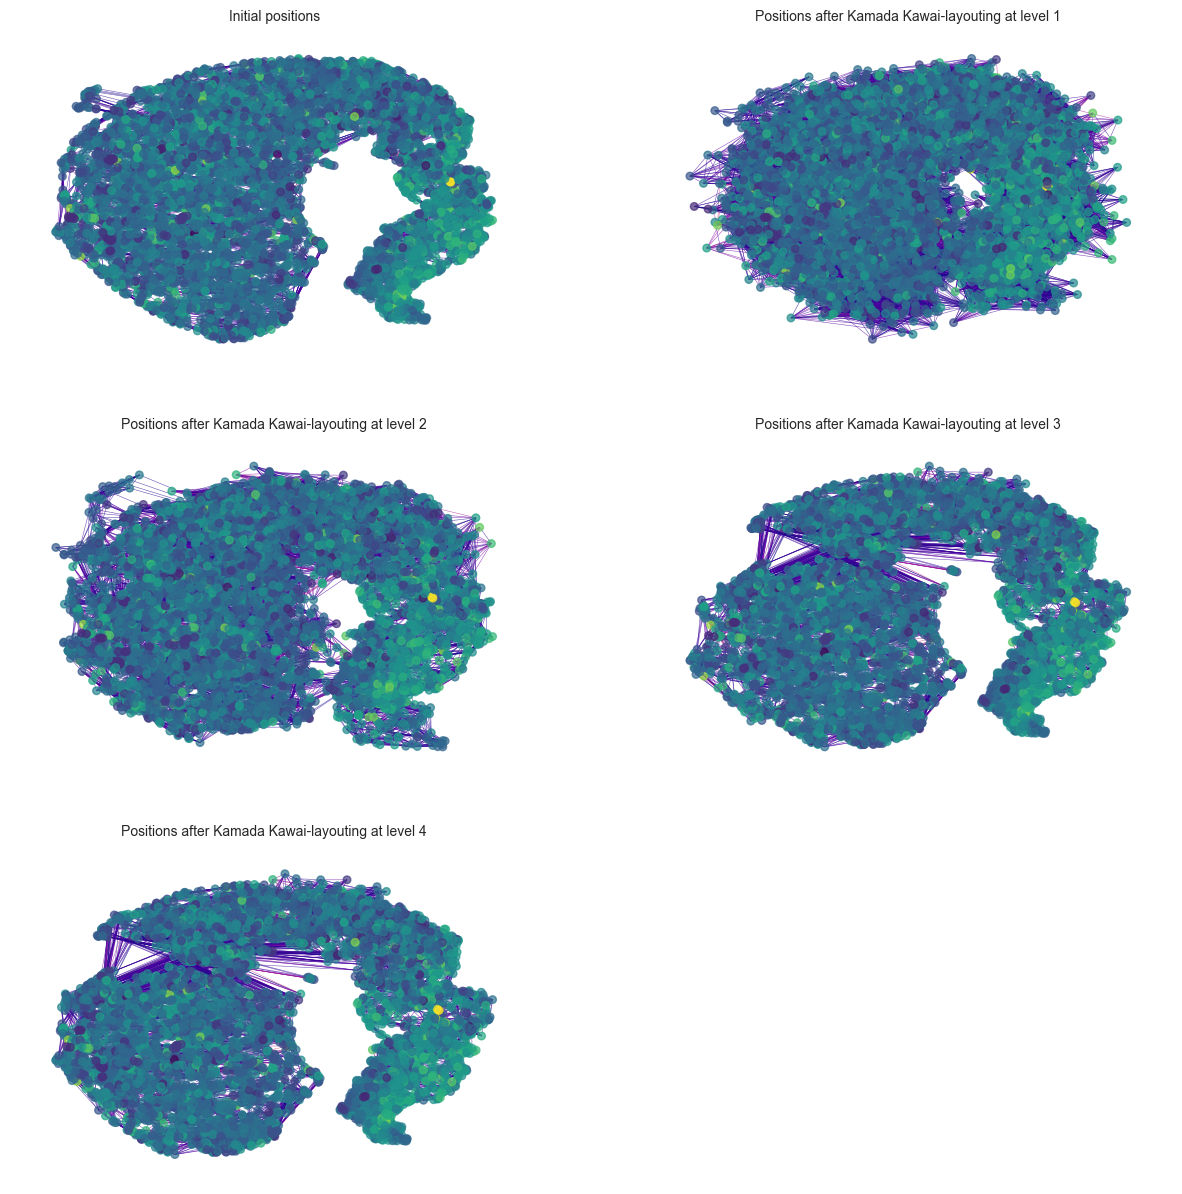

In [39]:
visualization.display_graphs(
    embeddings_uci186,
    figsize_columns=2,
    figsize=(15, 15),
    show_edges=True,
    cmap="viridis",
    show_cbar=False,
    show_partition_centers=False,
)

### Evaluation

In [40]:
embeddings_uci186 = evaluation.compute_pairwise_metrics(X_uci186, embeddings_uci186)

------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  0
Computation finished after 2.36 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  1
Computation finished after 1.37 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  2
Computation finished after 1.39 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  3
Computation finished after 1.36 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  4
Comput

In [ ]:
embeddings_uci186 = evaluation.compute_global_metrics(
    X_uci186, embeddings_uci186, [target_feature_uci186]
)

------------------------------------------------------------
Computing global metrics for embedding with marker:  0
Computation finished after 47.97 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  1
Computation finished after 45.11 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  2
Computation finished after 45.80 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  3
Computation finished after 39.36 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  4
Computation 

In [42]:
metrics_df_uci186 = evaluation.metrics_report(embeddings_uci186)
metrics_df_uci186

,marker,m_total_score,metric_jaccard (size),m_q_local,m_trustworthiness,m_continuity,m_shepard_spearman,m_kruskal_stress,m_kruskal_stress_community
0,0.0,-0.028631,6497.0,0.731559,0.0,0.0,0.033156,1.907869,0.752726
1,1.0,-0.005273,6497.0,0.524153,0.0,0.0,0.030263,1.580783,0.738814
2,2.0,-0.002628,6497.0,0.601833,0.0,0.0,0.028671,1.643646,0.739830
3,3.0,-0.044739,6497.0,0.669485,0.0,0.0,0.033237,1.926418,0.738538
4,4.0,-0.043240,6497.0,0.670422,0.0,0.0,0.033252,1.919876,0.740385


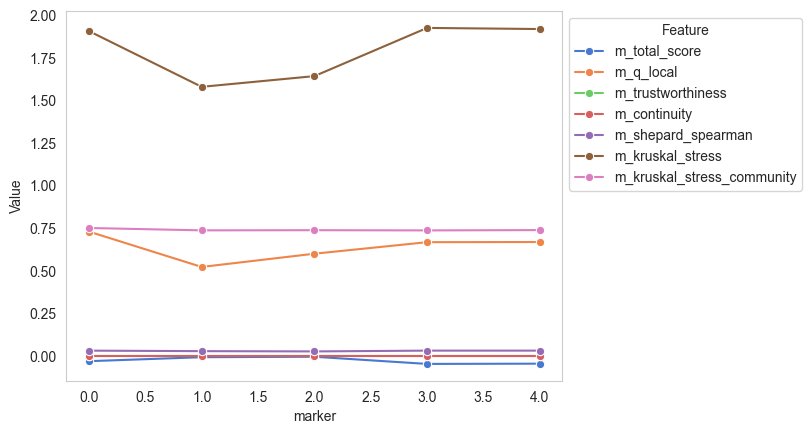

In [43]:
visualization.plot_metrics_report(metrics_df_uci186)

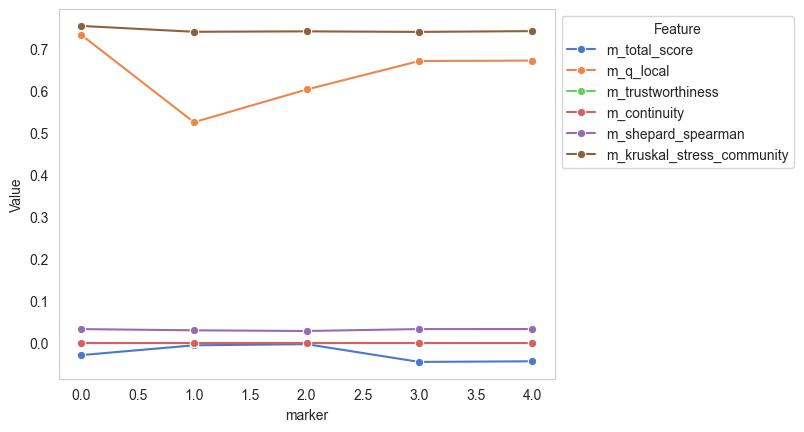

In [ ]:
metrics_df_uci186 = metrics_df_uci186.drop("m_kruskal_stress", axis=1)
visualization.plot_metrics_report(metrics_df_uci186)

## Interactive Visualization

In [ ]:
import utils

utils.save_pickle(embeddings_uci186, filename="results_ml_dr_uci186")

In [ ]:
import utils

embeddings_uci186 = utils.load_pickle(filename="results_ml_dr_uci186_20250508-170711")

In [ ]:
for emb in embeddings_uci186:
    emb.labels = {
        i: X_uci186.at[i, target_feature_uci186] for i in range(len(X_uci186))
    }

In [ ]:
from dash_overlay import DashOverlay

dash_app = DashOverlay(embeddings_uci186)

In [ ]:
dash_app.run()